In [1]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df5 = pd.read_csv('LASER PULSE- PAM Air Trích xuất dữ liệu Quý IV 2022.csv.xlsx - Phòng 05- THCS Lê Minh Xuân.csv')
df6 = pd.read_csv('LASER PULSE- PAM Air Trích xuất dữ liệu Quý IV 2022.csv.xlsx - Phòng 06- THCS Lê Minh Xuân.csv')
df7 = pd.read_csv('LASER PULSE- PAM Air Trích xuất dữ liệu Quý IV 2022.csv.xlsx - Phòng 07- THCS Lê Minh Xuân.csv')
df8 = pd.read_csv('LASER PULSE- PAM Air Trích xuất dữ liệu Quý IV 2022.csv.xlsx - Trường THCS Lê Minh Xuân.csv')

In [5]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STT             2197 non-null   int64  
 1   Time            2197 non-null   object 
 2   Ngày            2197 non-null   int64  
 3   Tháng           2197 non-null   int64  
 4   Năm             2197 non-null   int64  
 5   Ngày-tháng-năm  2197 non-null   object 
 6   PM2.5           2197 non-null   float64
 7   Nhiệt độ        2197 non-null   float64
 8   Độ ẩm           2197 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 154.6+ KB


In [6]:
df5['timestamp'] = pd.to_datetime(df5['Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df5.set_index('timestamp', inplace=True)
df5.drop(columns=['Ngày', 'Tháng', 'Năm', 'Ngày-tháng-năm', 'Time', 'STT'], inplace=True)
df5.head()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,85.92,29.58,90.35
2022-10-01 01:00:00,71.11,29.53,91.65
2022-10-01 02:00:00,45.83,29.40,92.80
2022-10-01 03:00:00,37.87,29.33,92.74
2022-10-01 04:00:00,37.30,29.30,92.39


In [7]:
df5.isnull()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,False,False,False
2022-10-01 01:00:00,False,False,False
2022-10-01 02:00:00,False,False,False
2022-10-01 03:00:00,False,False,False
2022-10-01 04:00:00,False,False,False
...,...,...,...
2022-12-31 19:00:00,False,False,False
2022-12-31 20:00:00,False,False,False
2022-12-31 21:00:00,False,False,False


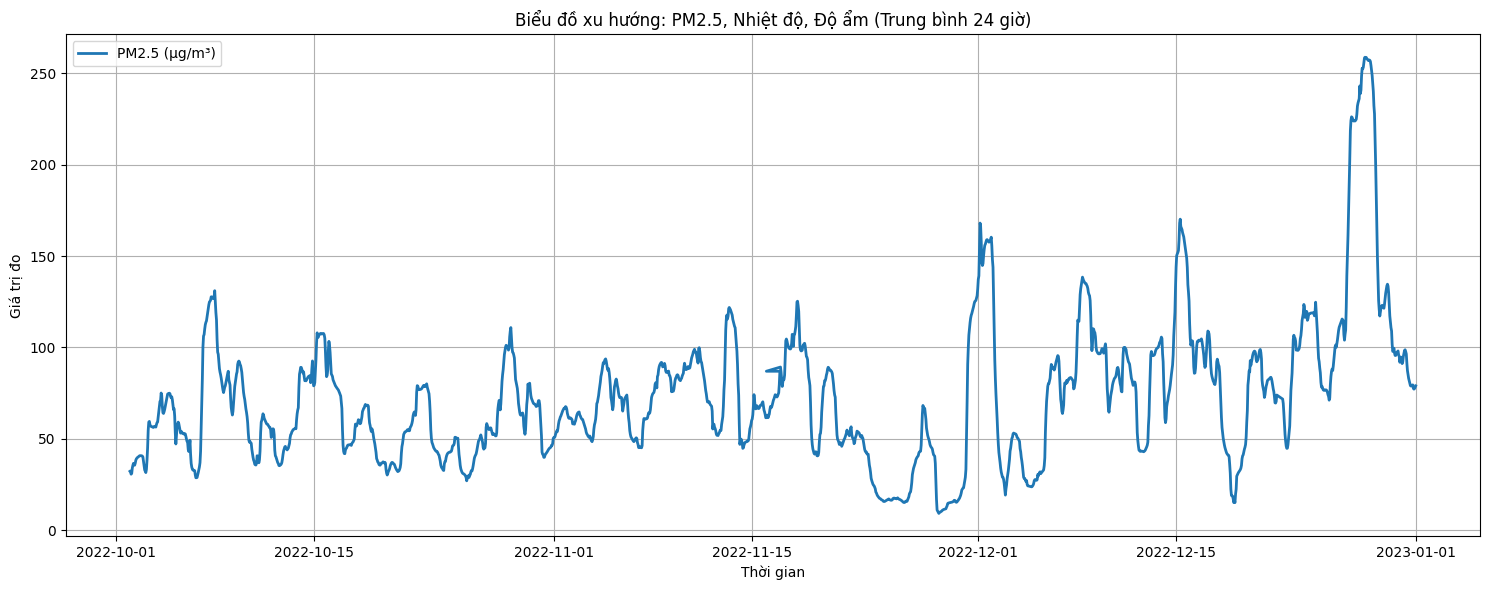

In [8]:
import matplotlib.pyplot as plt
df_smoothed = df5[['PM2.5']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['PM2.5'], label='PM2.5 (µg/m³)', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng: PM2.5, Nhiệt độ, Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
daily_avg = df5['PM2.5'].resample('D').mean()

top_days = daily_avg.sort_values(ascending=False).head(5)
print("Highest PM2.5 days:")
print(top_days)

zoom_day = top_days.index[0]

Highest PM2.5 days:
timestamp
2022-12-28    240.216250
2022-12-27    236.204583
2022-12-01    155.554583
2022-12-29    134.626250
2022-12-14    133.142083
Name: PM2.5, dtype: float64


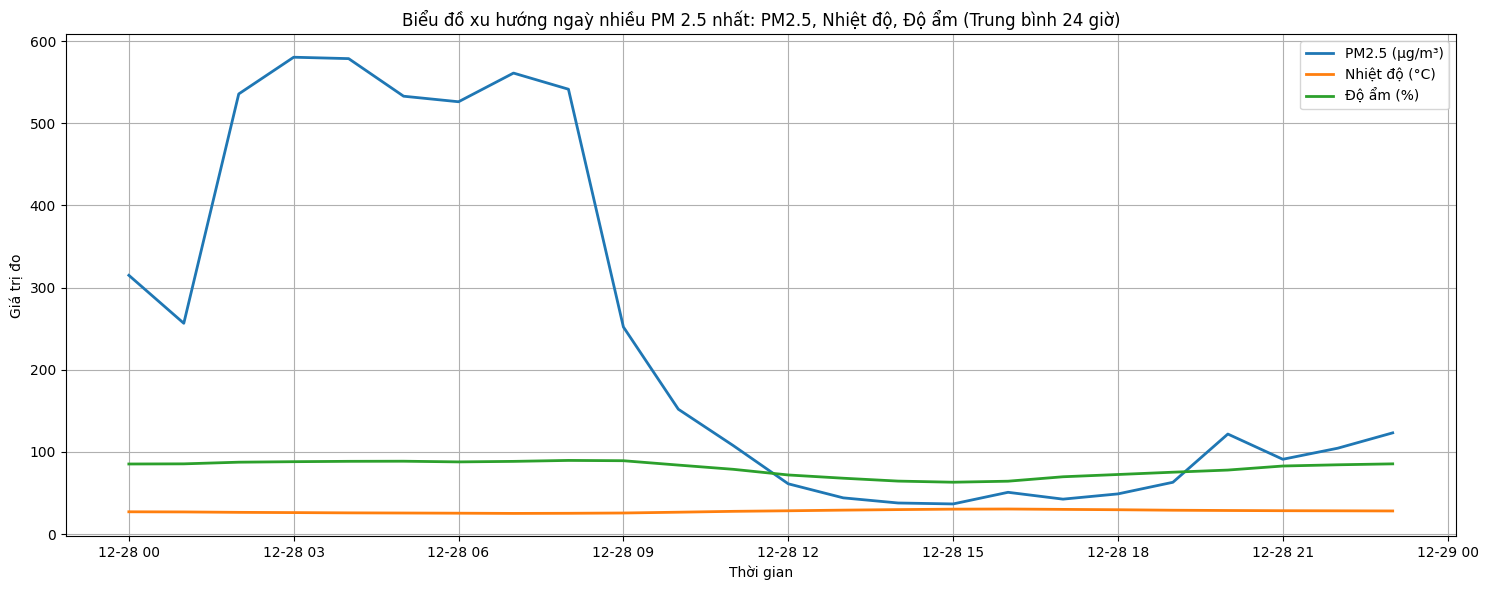

In [10]:
df_best_day = df5.loc[zoom_day.strftime('%Y-%m-%d')]
plt.figure(figsize=(15, 6))
plt.plot(df_best_day.index, df_best_day['PM2.5'], label='PM2.5 (µg/m³)', linewidth=2)
plt.plot(df_best_day.index, df_best_day['Nhiệt độ'], label='Nhiệt độ (°C)', linewidth=2)
plt.plot(df_best_day.index, df_best_day['Độ ẩm'], label='Độ ẩm (%)', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng ngaỳ nhiều PM 2.5 nhất: PM2.5, Nhiệt độ, Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

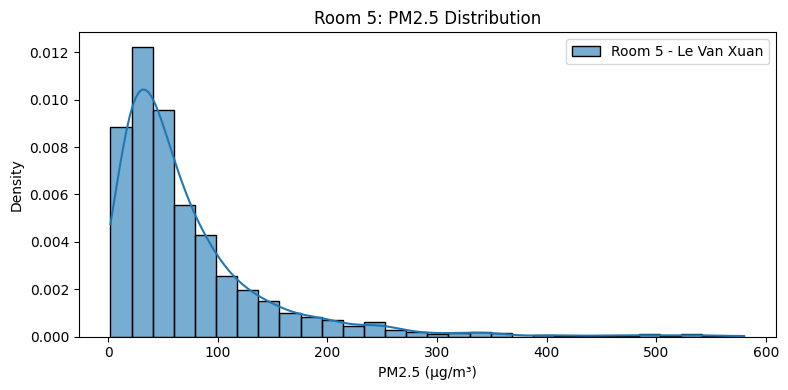

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df5, 
    x='PM2.5',            
    label='Room 5 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 5: PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df6['timestamp'] = pd.to_datetime(df6['Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df6.set_index('timestamp', inplace=True)
df6.drop(columns=['Ngày', 'Tháng', 'Năm', 'Ngày-tháng-năm', 'Time', 'STT'], inplace=True)
df6.head()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,77.67,29.34,97.12
2022-10-01 01:00:00,66.45,29.27,98.23
2022-10-01 02:00:00,43.63,29.15,99.35
2022-10-01 03:00:00,34.88,29.08,99.33
2022-10-01 04:00:00,33.62,29.04,99.06


In [13]:
df7['timestamp'] = pd.to_datetime(df7['Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df7.set_index('timestamp', inplace=True)
df7.drop(columns=['Ngày', 'Tháng', 'Năm', 'Ngày-tháng-năm', 'Time', 'STT'], inplace=True)
df7.head()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,83.48,29.83,84.20
2022-10-01 01:00:00,70.75,29.77,85.48
2022-10-01 02:00:00,45.28,29.66,86.52
2022-10-01 03:00:00,37.11,29.63,86.38
2022-10-01 04:00:00,36.44,29.58,86.06


In [14]:
df8['timestamp'] = pd.to_datetime(df8['Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df8.set_index('timestamp', inplace=True)
df8.drop(columns=['Ngày', 'Tháng', 'Năm', 'Ngày-tháng-năm', 'Time', 'STT'], inplace=True)
df8.head()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,92.86,32.96,98.99
2022-10-01 01:00:00,75.58,32.99,98.99
2022-10-01 02:00:00,56.73,32.88,98.99
2022-10-01 03:00:00,64.72,32.61,98.99
2022-10-01 04:00:00,49.30,32.46,98.99


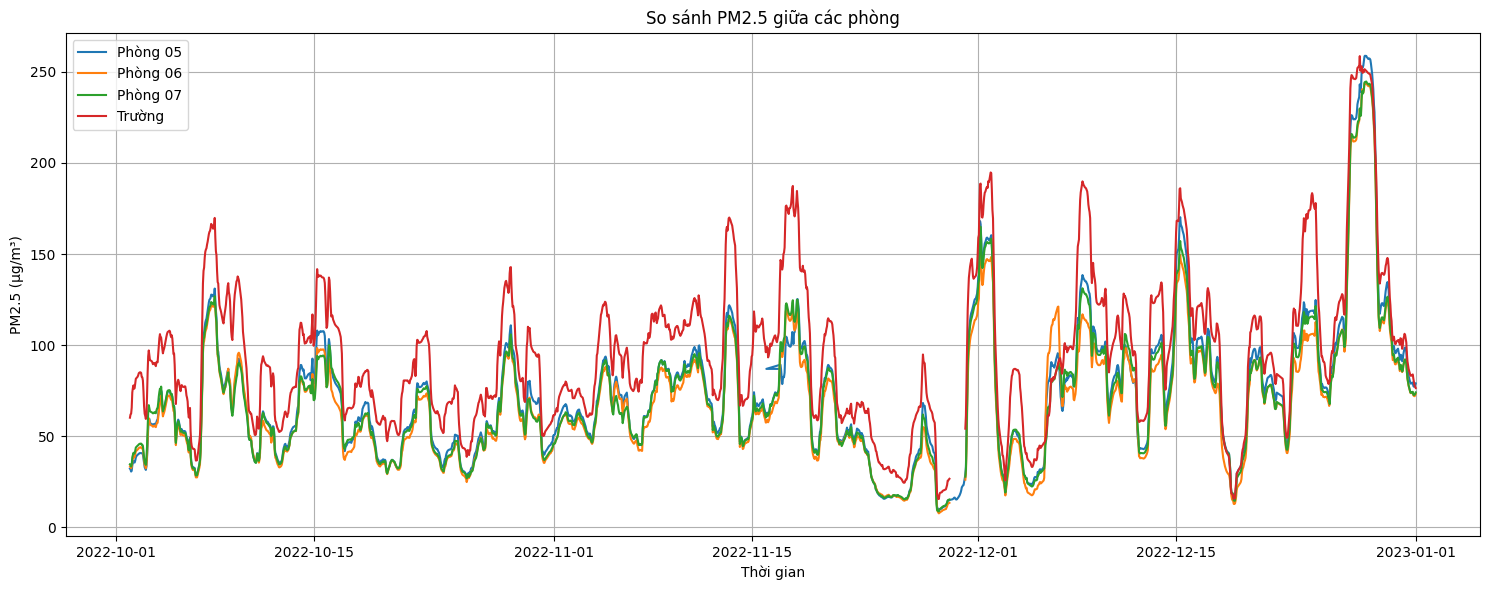

In [18]:
import matplotlib.pyplot as plt
df5_smoothed = df5[['PM2.5']].rolling(window=24).mean()
df6_smoothed = df6[['PM2.5']].rolling(window=24).mean()
df7_smoothed = df7[['PM2.5']].rolling(window=24).mean()
df8_smoothed = df8[['PM2.5']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df5_smoothed['PM2.5'], label='Phòng 05')
plt.plot(df6_smoothed['PM2.5'], label='Phòng 06')
plt.plot(df7_smoothed['PM2.5'], label='Phòng 07')
plt.plot(df8_smoothed['PM2.5'], label='Trường')

plt.title('So sánh PM2.5 giữa các phòng')
plt.xlabel('Thời gian')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

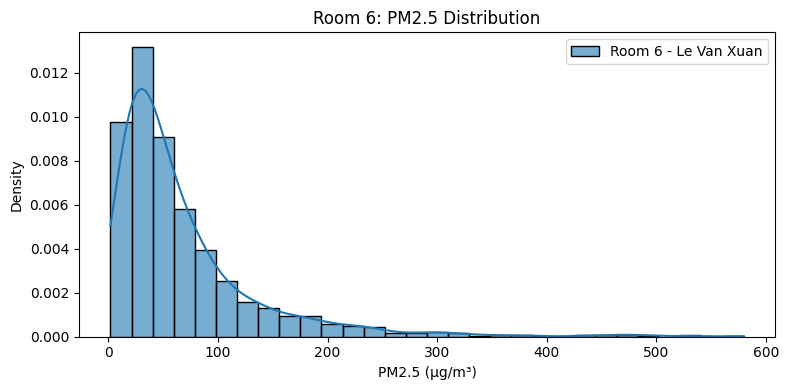

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df6, 
    x='PM2.5',            
    label='Room 6 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 6: PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

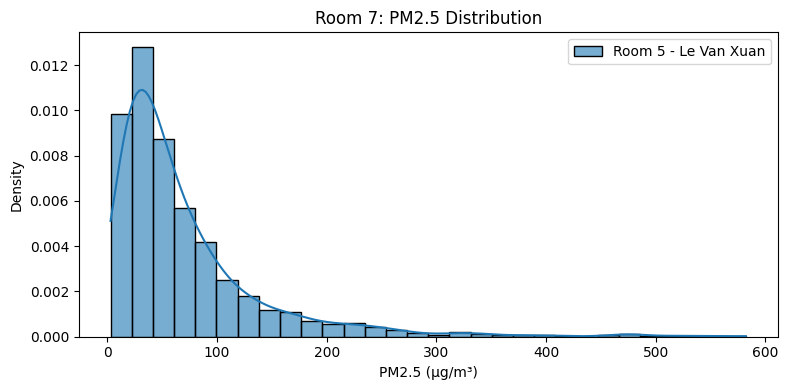

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df7, 
    x='PM2.5',            
    label='Room 5 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 7: PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

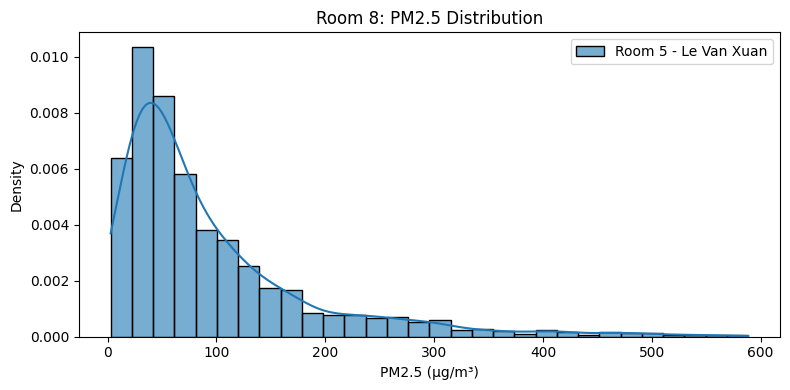

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df8, 
    x='PM2.5',            
    label='Room 5 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 8: PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Correlation matrix:
                Room 5    Room 6    Room 7  General Room
Room 5        1.000000  0.975140  0.974073      0.925630
Room 6        0.975140  1.000000  0.984868      0.927430
Room 7        0.974073  0.984868  1.000000      0.946987
General Room  0.925630  0.927430  0.946987      1.000000


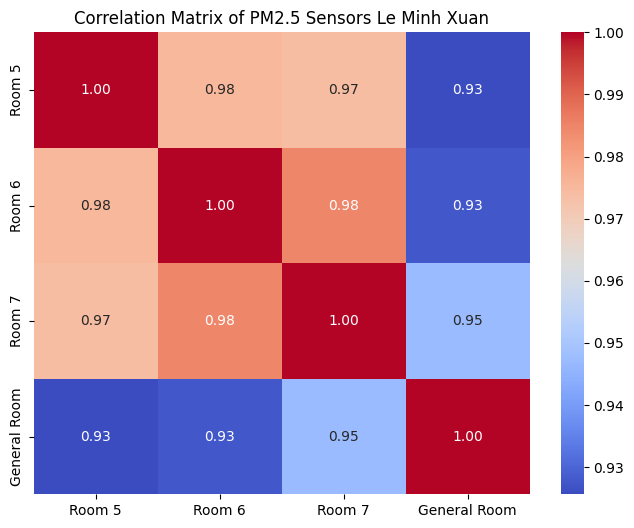

In [22]:
df_corr = pd.DataFrame({
    'Room 5': df5['PM2.5'].values,
    'Room 6': df6['PM2.5'].values,
    'Room 7': df7['PM2.5'].values,
    'General Room': df8['PM2.5'].values
})

corr_matrix = df_corr.corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PM2.5 Sensors Le Minh Xuan')
plt.show()

R-squared Matrix:
                Room 5    Room 6    Room 7  General Room
Room 5        1.000000  0.950898  0.948818      0.856791
Room 6        0.950898  1.000000  0.969964      0.860126
Room 7        0.948818  0.969964  1.000000      0.896785
General Room  0.856791  0.860126  0.896785      1.000000


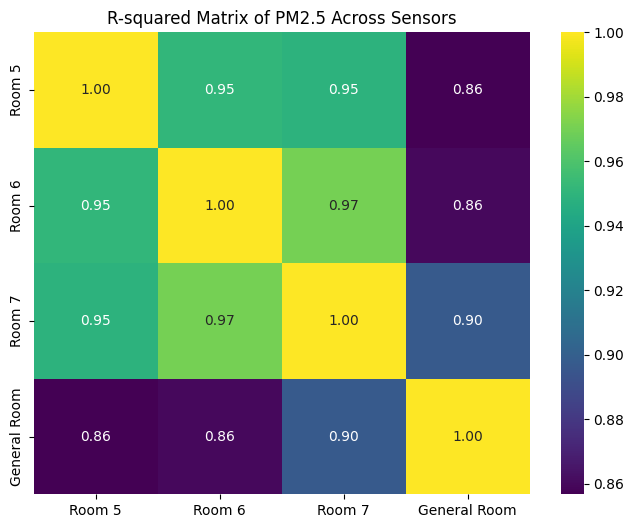

In [23]:
r_squared_matrix = corr_matrix ** 2
print("R-squared Matrix:")
print(r_squared_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(r_squared_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("R-squared Matrix of PM2.5 Across Sensors")
plt.show()

In [4]:
df5['timestamp'] = pd.to_datetime(df5['Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df5.set_index('timestamp', inplace=True)
df5.drop(columns=['Ngày', 'Tháng', 'Năm', 'Ngày-tháng-năm', 'Time', 'STT'], inplace=True)
df5.head()

,PM2.5,Nhiệt độ,Độ ẩm
timestamp,,,
2022-10-01 00:00:00,85.92,29.58,90.35
2022-10-01 01:00:00,71.11,29.53,91.65
2022-10-01 02:00:00,45.83,29.40,92.80
2022-10-01 03:00:00,37.87,29.33,92.74
2022-10-01 04:00:00,37.30,29.30,92.39


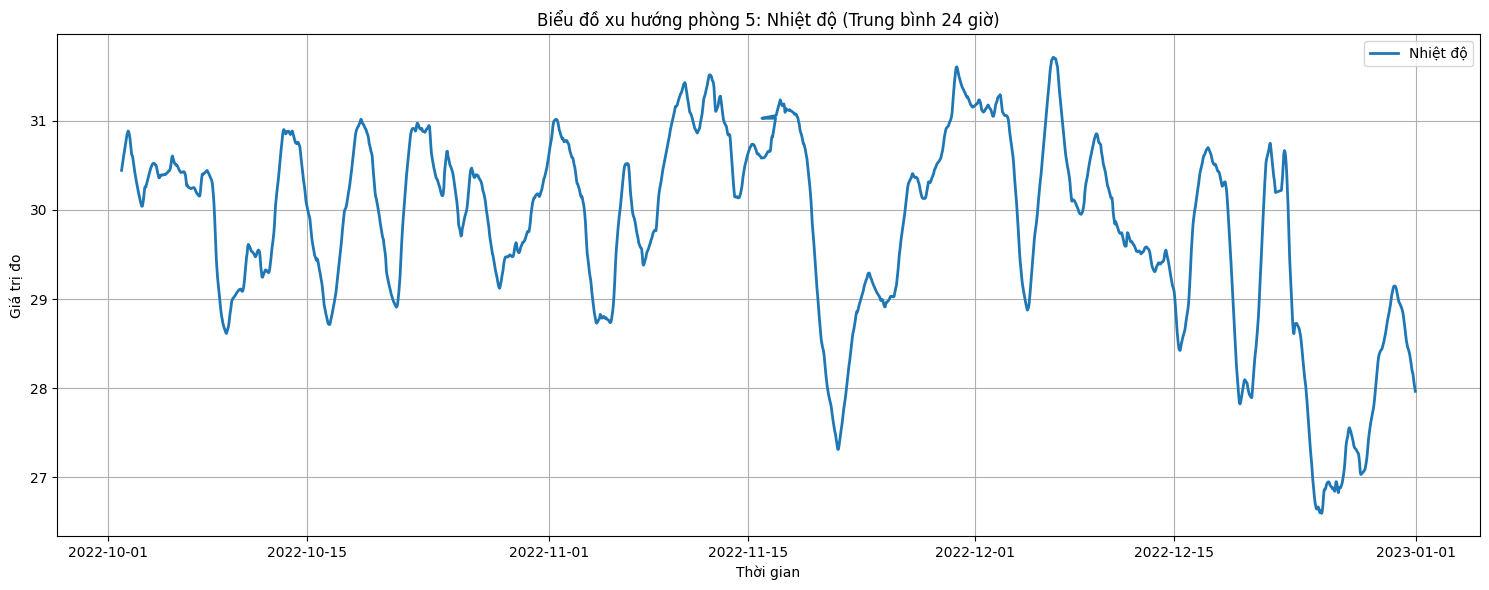

In [10]:
import matplotlib.pyplot as plt
df_smoothed = df5[['Nhiệt độ']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Nhiệt độ'], label='Nhiệt độ', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 5: Nhiệt độ (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

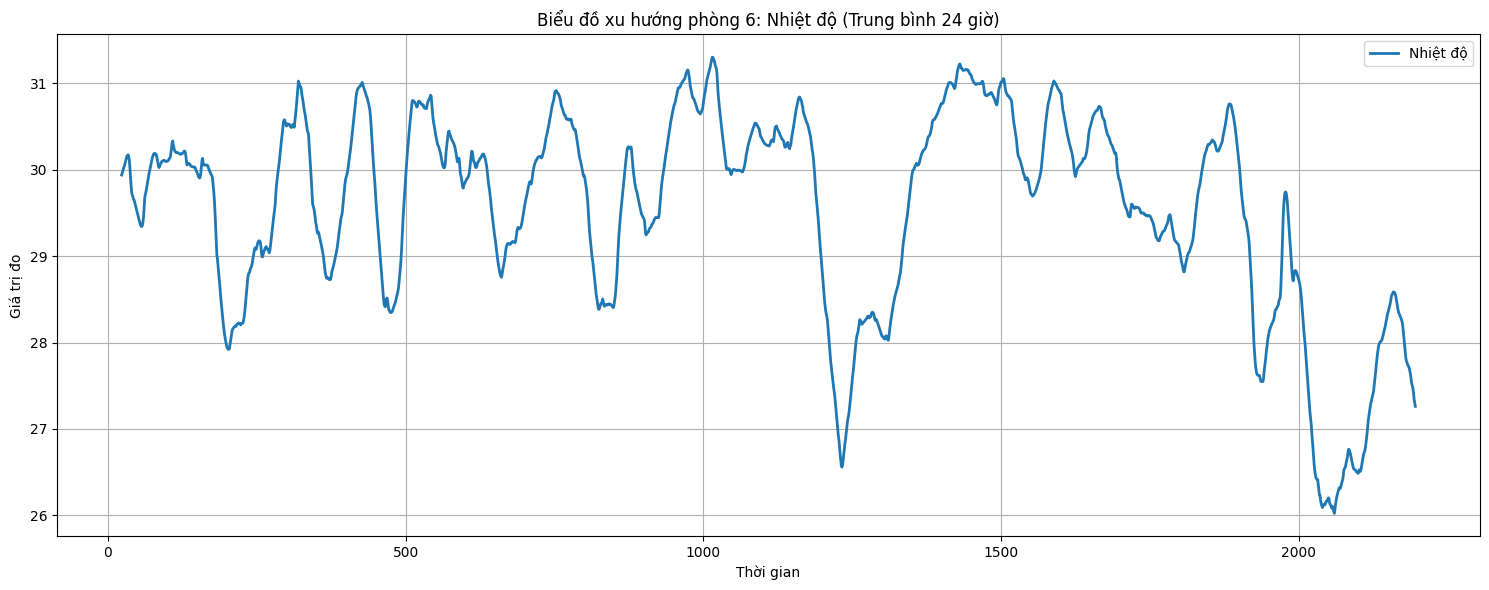

In [11]:
import matplotlib.pyplot as plt
df_smoothed = df6[['Nhiệt độ']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Nhiệt độ'], label='Nhiệt độ', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 6: Nhiệt độ (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

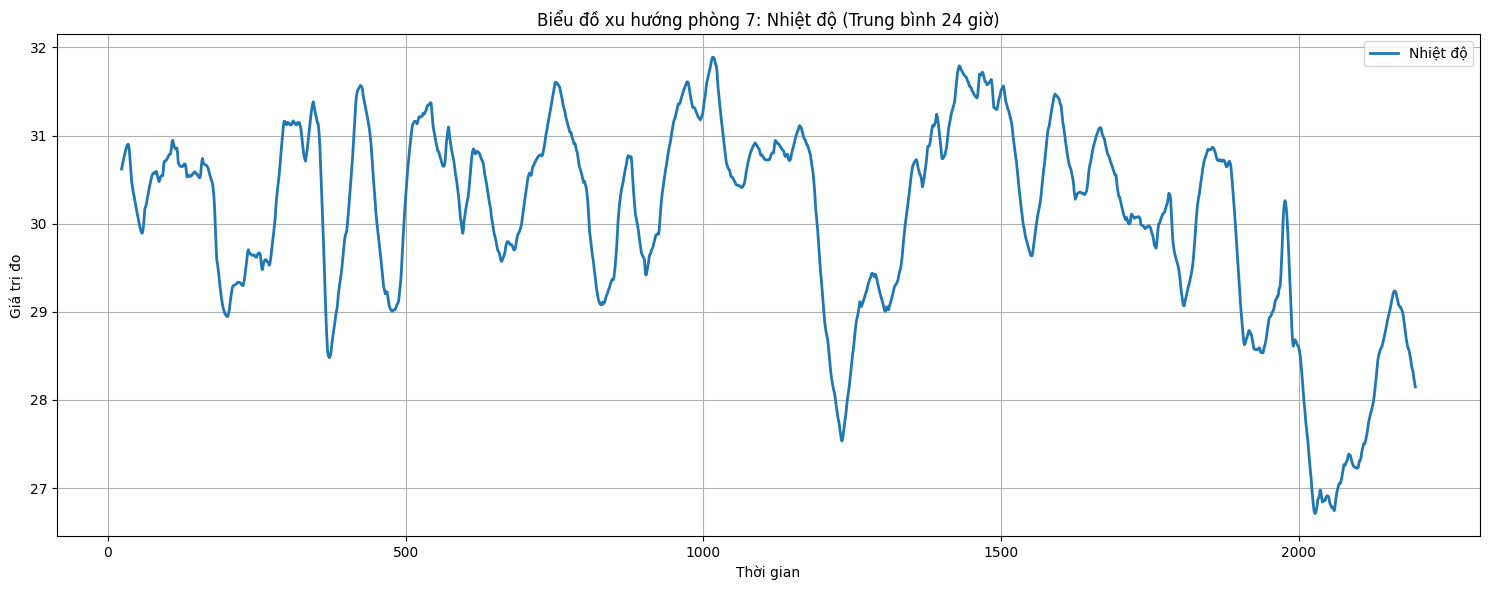

In [12]:
import matplotlib.pyplot as plt
df_smoothed = df7[['Nhiệt độ']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Nhiệt độ'], label='Nhiệt độ', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 7: Nhiệt độ (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

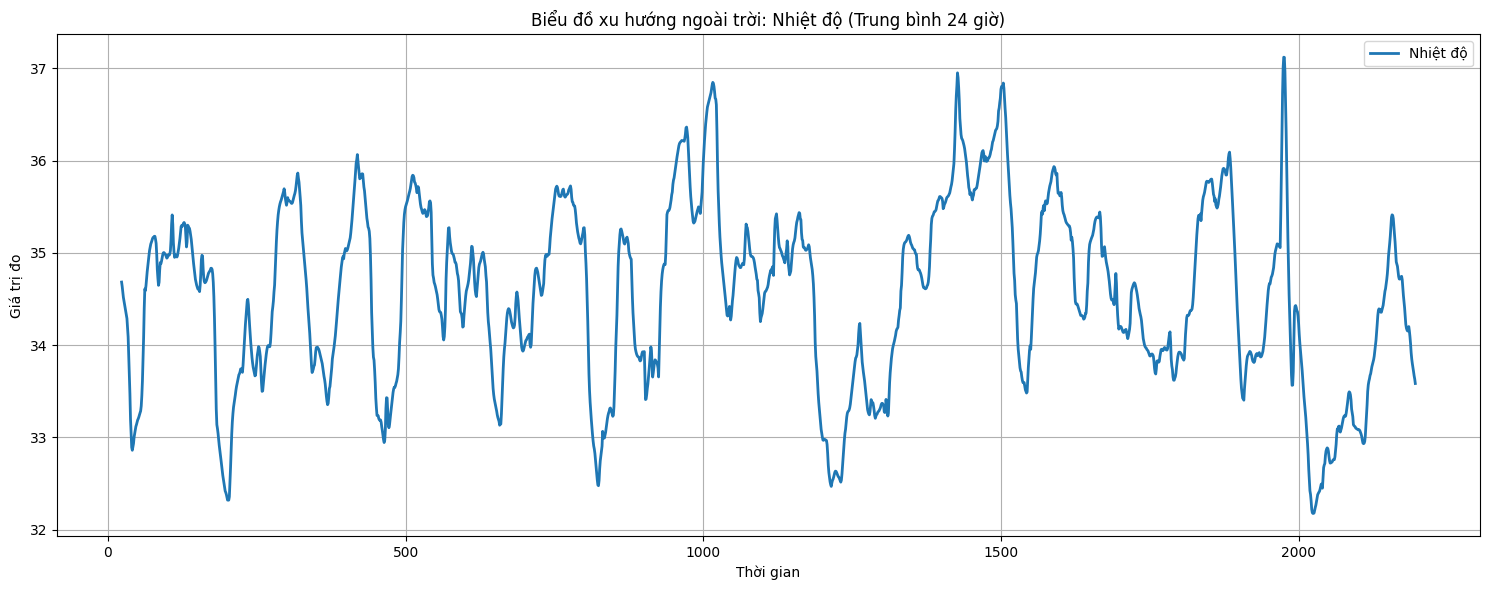

In [13]:
import matplotlib.pyplot as plt
df_smoothed = df8[['Nhiệt độ']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Nhiệt độ'], label='Nhiệt độ', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng ngoài trời: Nhiệt độ (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

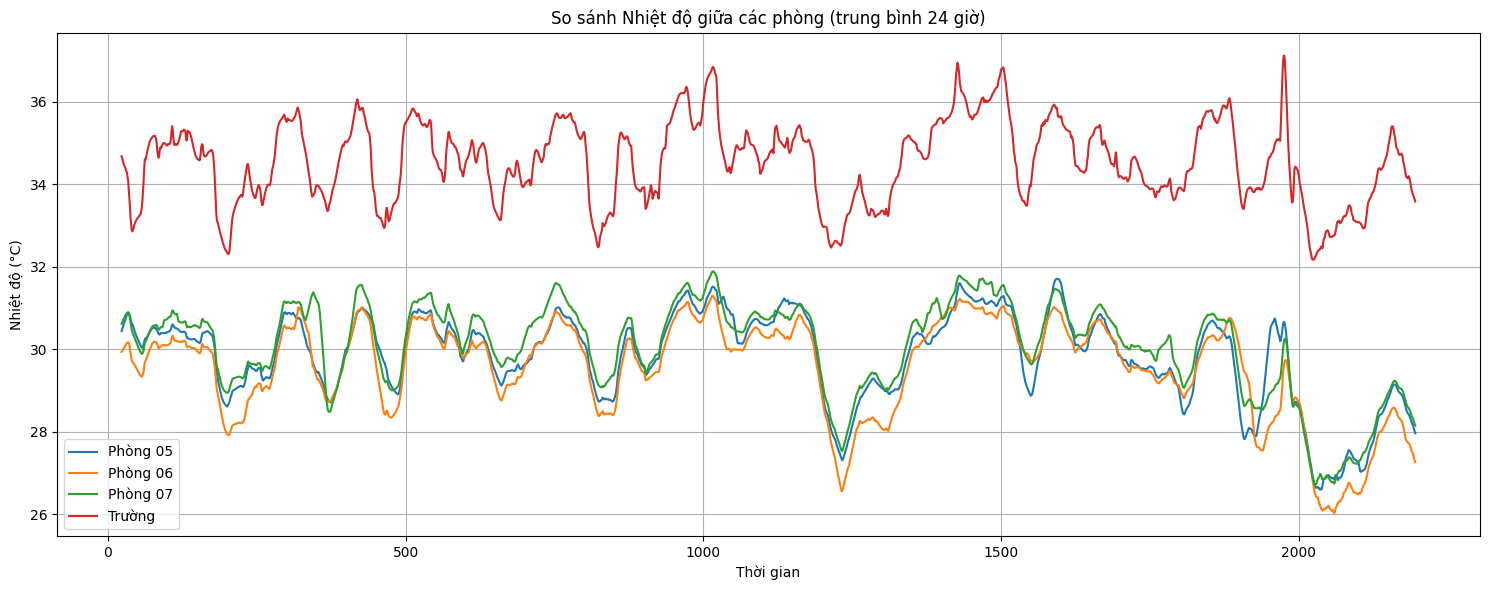

In [16]:
import matplotlib.pyplot as plt

df5_smoothed = df5[['Nhiệt độ']].rolling(window=24).mean()
df6_smoothed = df6[['Nhiệt độ']].rolling(window=24).mean()
df7_smoothed = df7[['Nhiệt độ']].rolling(window=24).mean()
df8_smoothed = df8[['Nhiệt độ']].rolling(window=24).mean()

plt.figure(figsize=(15, 6))
plt.plot(df5_smoothed['Nhiệt độ'], label='Phòng 05')
plt.plot(df6_smoothed['Nhiệt độ'], label='Phòng 06')
plt.plot(df7_smoothed['Nhiệt độ'], label='Phòng 07')
plt.plot(df8_smoothed['Nhiệt độ'], label='Trường')

plt.title('So sánh Nhiệt độ giữa các phòng (trung bình 24 giờ)')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

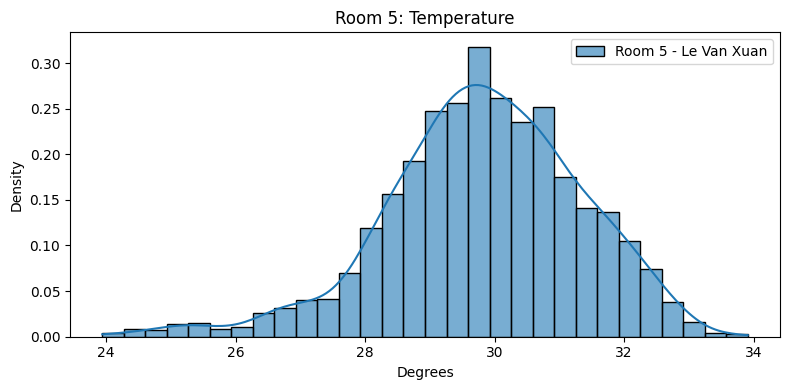

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df5, 
    x='Nhiệt độ',            
    label='Room 5 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 5: Temperature')
plt.xlabel('Degrees')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

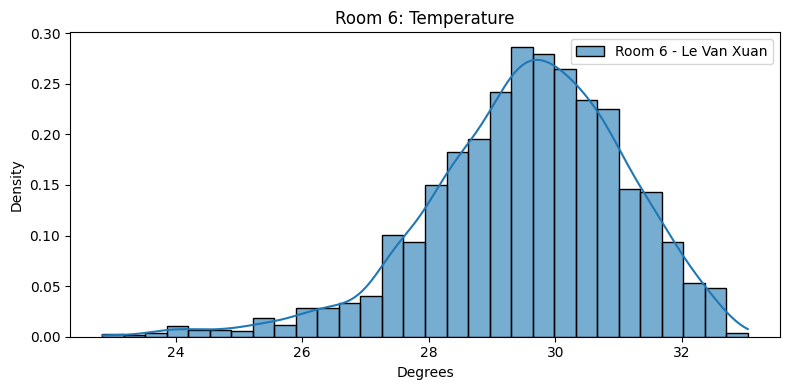

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df6, 
    x='Nhiệt độ',            
    label='Room 6 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 6: Temperature')
plt.xlabel('Degrees')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

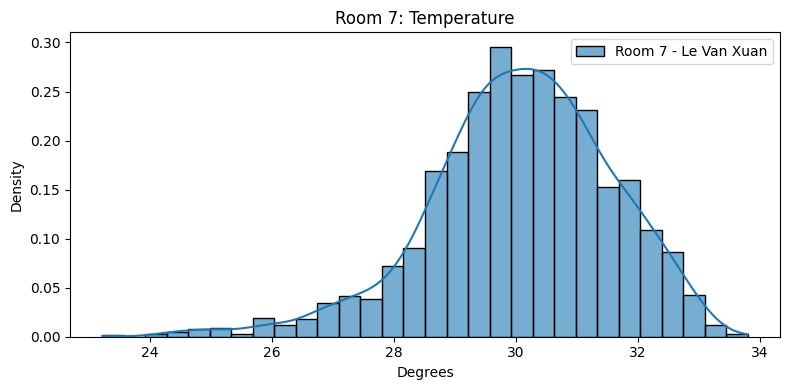

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df7, 
    x='Nhiệt độ',            
    label='Room 7 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 7: Temperature')
plt.xlabel('Degrees')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

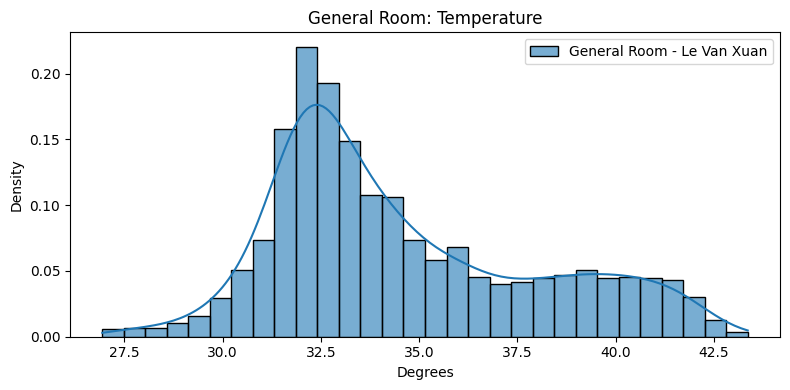

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df8, 
    x='Nhiệt độ',            
    label='General Room - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('General Room: Temperature')
plt.xlabel('Degrees')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Correlation matrix:
                Room 5    Room 6    Room 7  General Room
Room 5        1.000000  0.933991  0.944357      0.654294
Room 6        0.933991  1.000000  0.955538      0.624278
Room 7        0.944357  0.955538  1.000000      0.632853
General Room  0.654294  0.624278  0.632853      1.000000


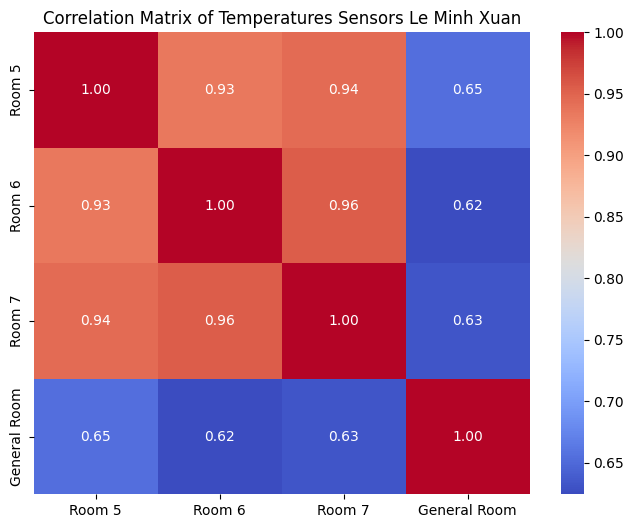

In [21]:
df_corr = pd.DataFrame({
    'Room 5': df5['Nhiệt độ'].values,
    'Room 6': df6['Nhiệt độ'].values,
    'Room 7': df7['Nhiệt độ'].values,
    'General Room': df8['Nhiệt độ'].values
})

corr_matrix = df_corr.corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperatures Sensors Le Minh Xuan')
plt.show()

R-squared Matrix:
                Room 5    Room 6    Room 7  General Room
Room 5        1.000000  0.872338  0.891811      0.428101
Room 6        0.872338  1.000000  0.913053      0.389722
Room 7        0.891811  0.913053  1.000000      0.400503
General Room  0.428101  0.389722  0.400503      1.000000


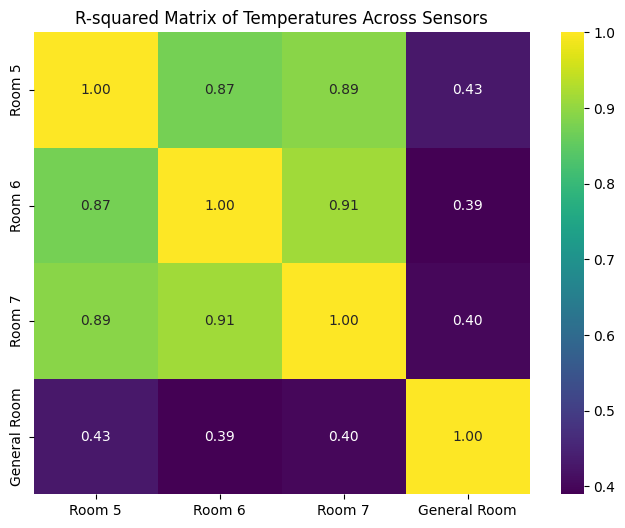

In [22]:
r_squared_matrix = corr_matrix ** 2
print("R-squared Matrix:")
print(r_squared_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(r_squared_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("R-squared Matrix of Temperatures Across Sensors")
plt.show()

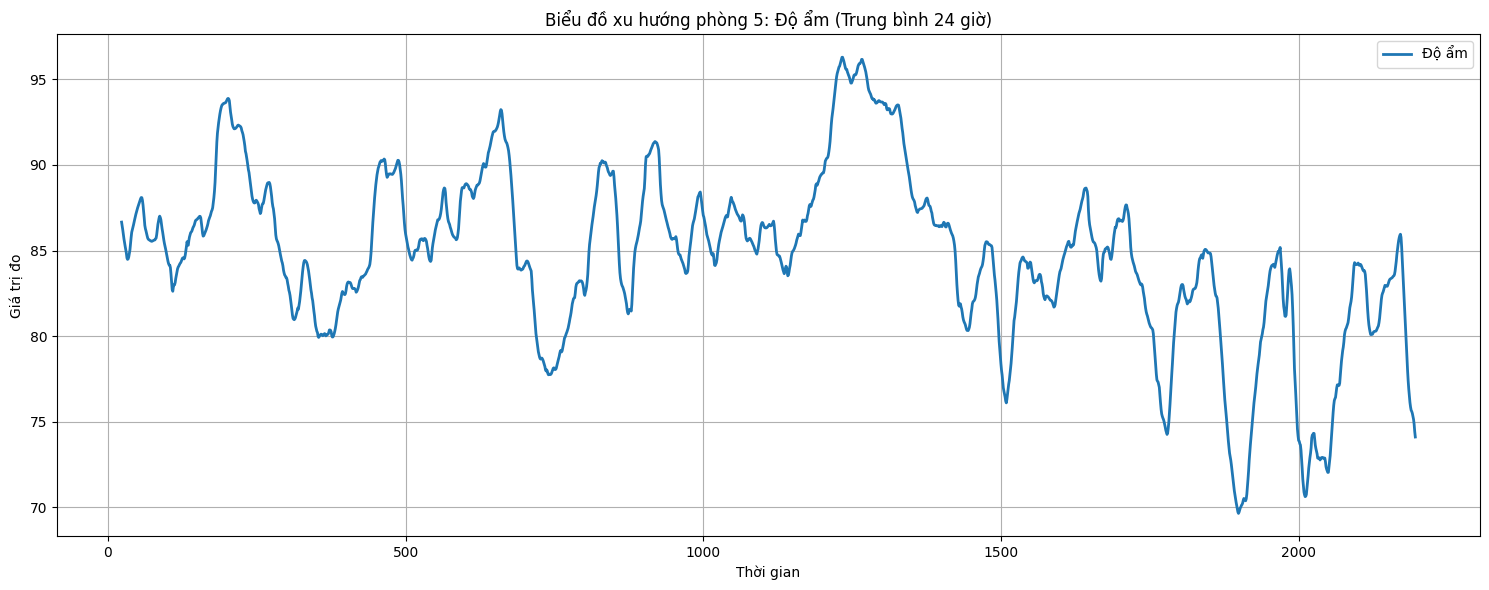

In [23]:
import matplotlib.pyplot as plt
df_smoothed = df5[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 5: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

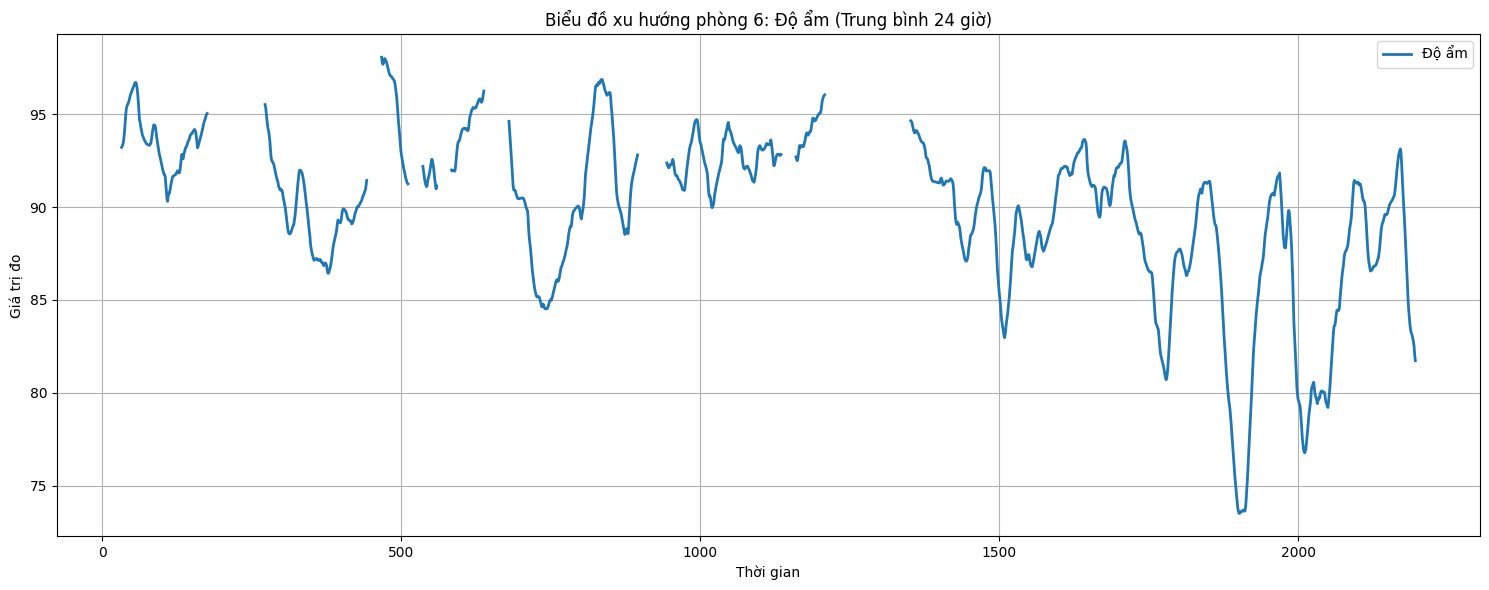

In [27]:
df_smoothed = df6[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 6: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df6['Độ ẩm'].isnull().sum()

np.int64(143)

In [31]:
df6.isnull().sum()

STT                 0
Time                0
Ngày                0
Tháng               0
Năm                 0
Ngày-tháng-năm      0
PM2.5               1
Nhiệt độ            0
Độ ẩm             143
dtype: int64

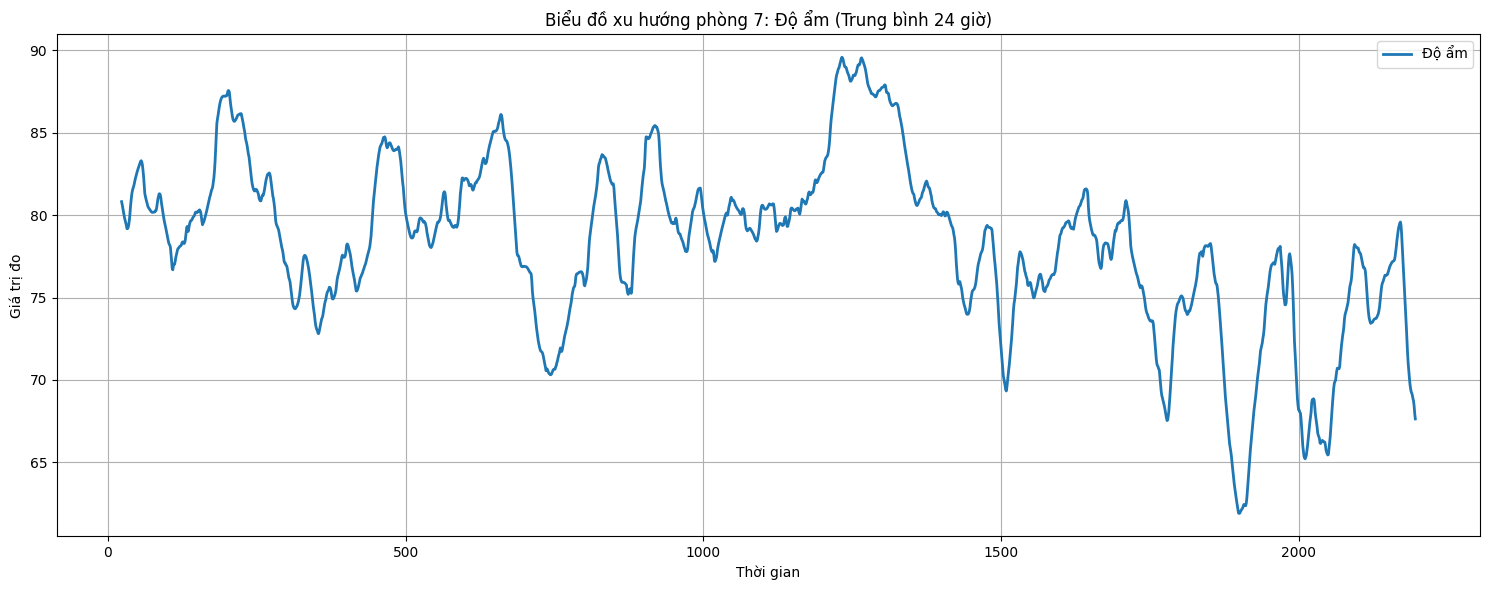

In [44]:
df6['Độ ẩm'] = df7['Độ ẩm'].interpolate(method='linear')
df_smoothed = df7[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 7: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_smoothed = df6[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 6: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

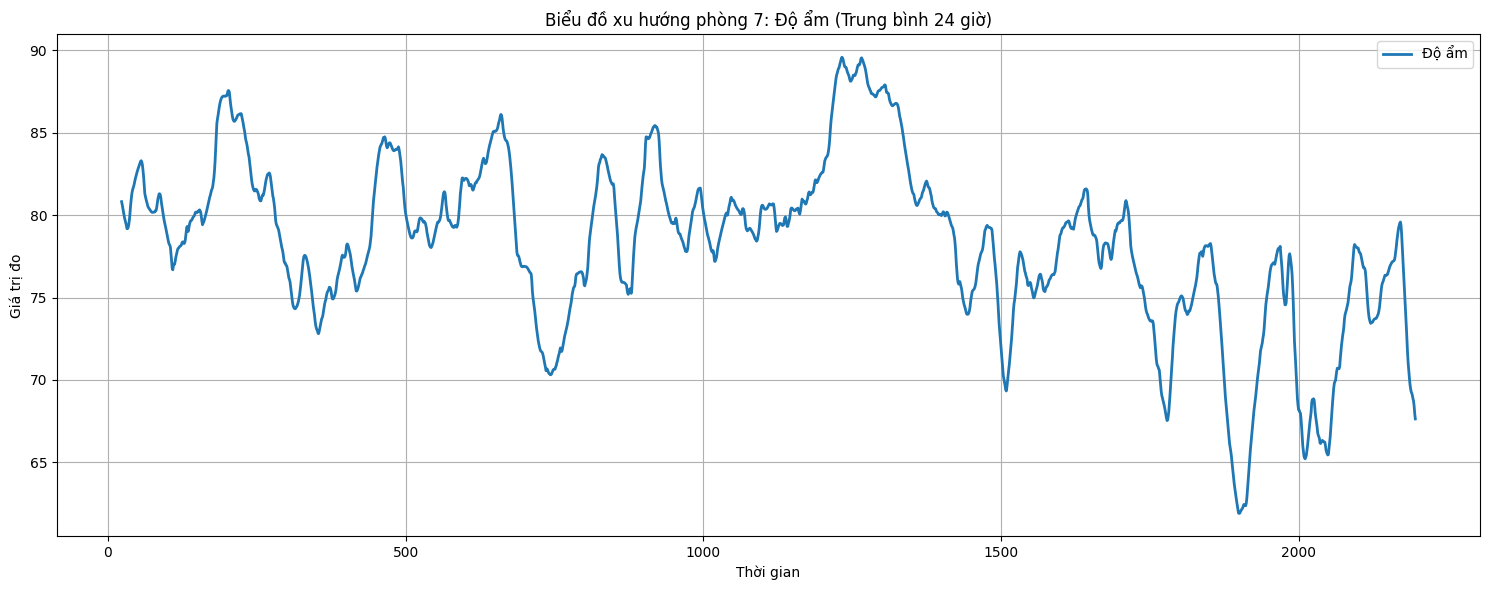

In [33]:
df_smoothed = df7[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng 7: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

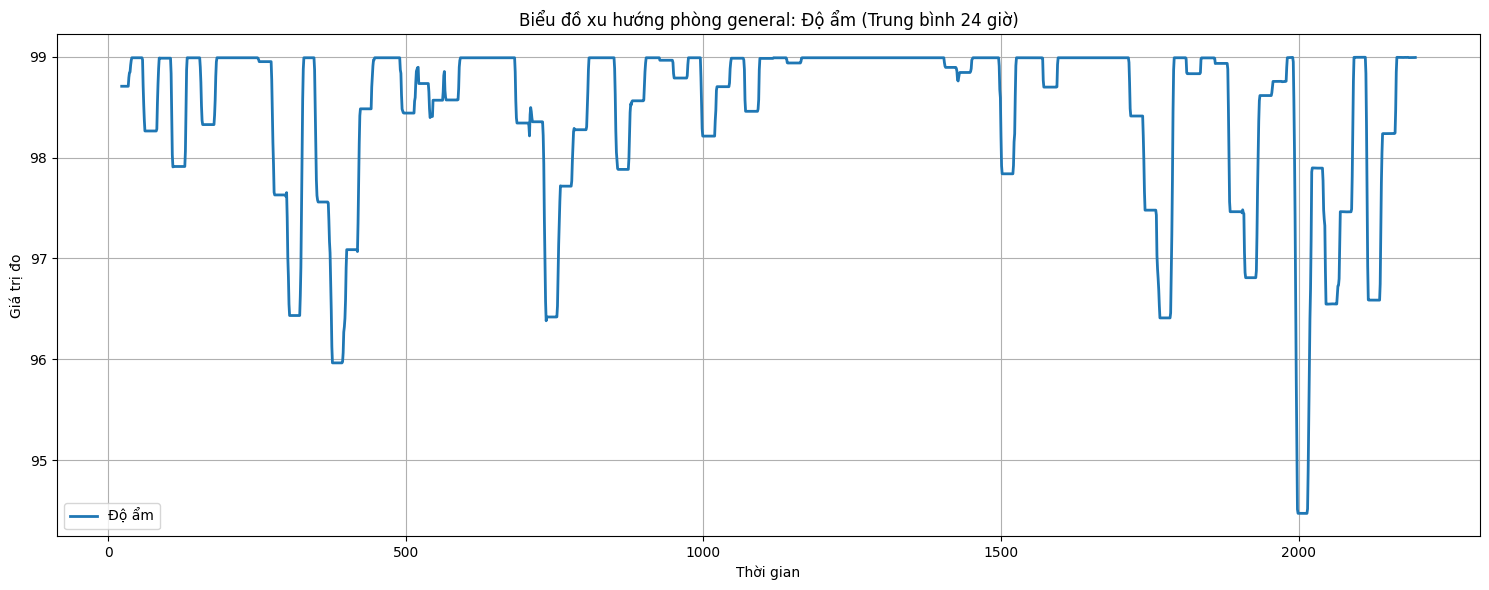

In [34]:
df_smoothed = df8[['Độ ẩm']].rolling(window=24).mean()
plt.figure(figsize=(15, 6))
plt.plot(df_smoothed.index, df_smoothed['Độ ẩm'], label='Độ ẩm', linewidth=2)

plt.xlabel('Thời gian')
plt.ylabel('Giá trị đo')
plt.title('Biểu đồ xu hướng phòng general: Độ ẩm (Trung bình 24 giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
df8

,STT,Time,Ngày,Tháng,Năm,Ngày-tháng-năm,PM2.5,Nhiệt độ,Độ ẩm
0,1,01-10-2022 0:00,1,10,2022,01-10-2022,92.86,32.96,98.99
1,2,01-10-2022 1:00,1,10,2022,01-10-2022,75.58,32.99,98.99
2,3,01-10-2022 2:00,1,10,2022,01-10-2022,56.73,32.88,98.99
3,4,01-10-2022 3:00,1,10,2022,01-10-2022,64.72,32.61,98.99
4,5,01-10-2022 4:00,1,10,2022,01-10-2022,49.30,32.46,98.99
...,...,...,...,...,...,...,...,...,...
2192,2193,31-12-2022 19:00,31,12,2022,31-12-2022,78.04,33.19,99.00
2193,2194,31-12-2022 20:00,31,12,2022,31-12-2022,106.71,32.65,98.99
2194,2195,31-12-2022 21:00,31,12,2022,31-12-2022,169.54,32.51,98.99
2195,2196,31-12-2022 22:00,31,12,2022,31-12-2022,147.01,32.66,99.00


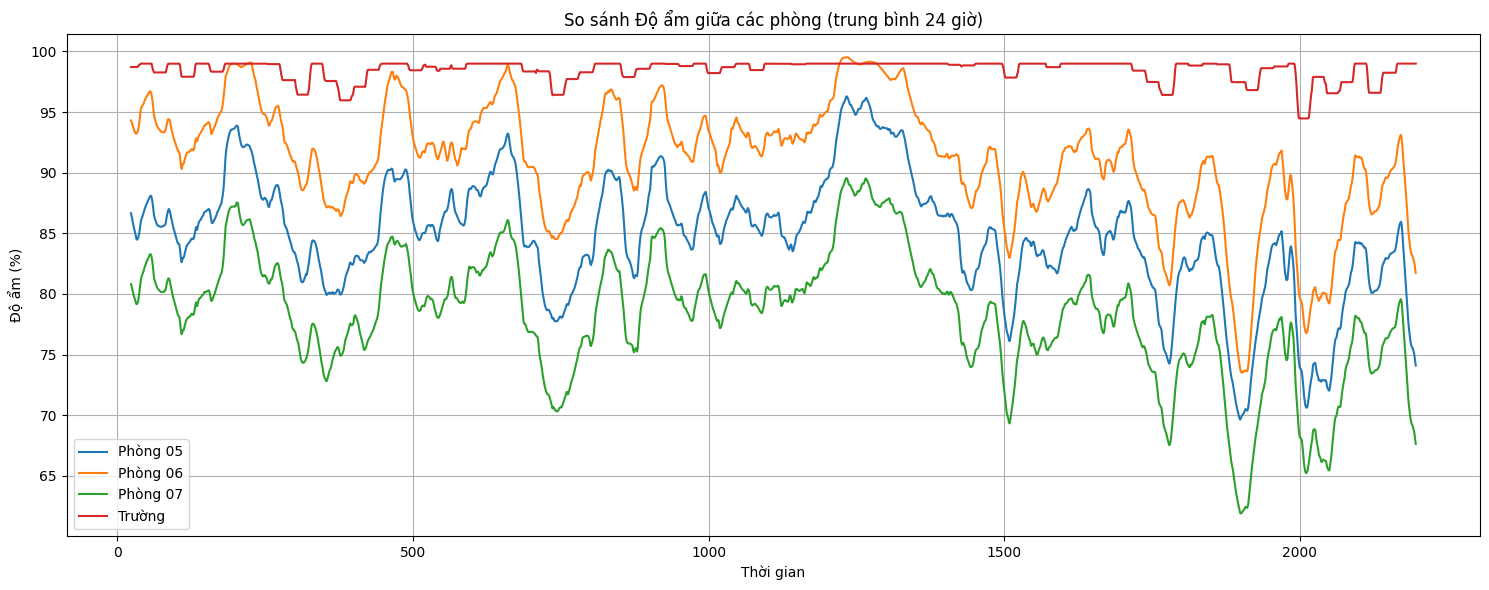

In [36]:
import matplotlib.pyplot as plt

df5_smoothed = df5[['Độ ẩm']].rolling(window=24).mean()
df6_smoothed = df6[['Độ ẩm']].rolling(window=24).mean()
df7_smoothed = df7[['Độ ẩm']].rolling(window=24).mean()
df8_smoothed = df8[['Độ ẩm']].rolling(window=24).mean()

plt.figure(figsize=(15, 6))
plt.plot(df5_smoothed['Độ ẩm'], label='Phòng 05')
plt.plot(df6_smoothed['Độ ẩm'], label='Phòng 06')
plt.plot(df7_smoothed['Độ ẩm'], label='Phòng 07')
plt.plot(df8_smoothed['Độ ẩm'], label='Trường')

plt.title('So sánh Độ ẩm giữa các phòng (trung bình 24 giờ)')
plt.xlabel('Thời gian')
plt.ylabel('Độ ẩm (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


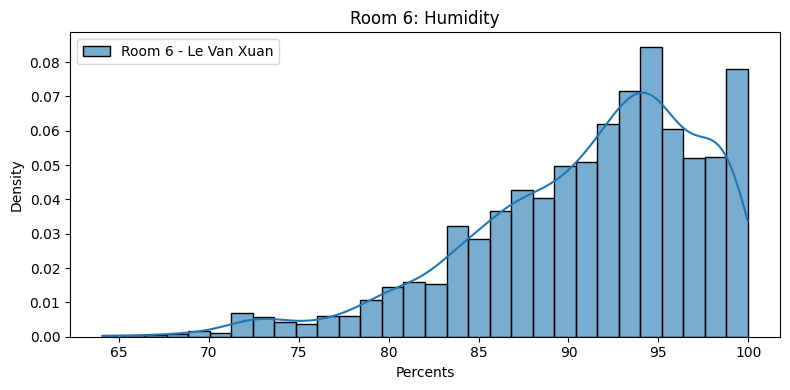

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df6, 
    x='Độ ẩm',            
    label='Room 6 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 6: Humidity')
plt.xlabel('Percents')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

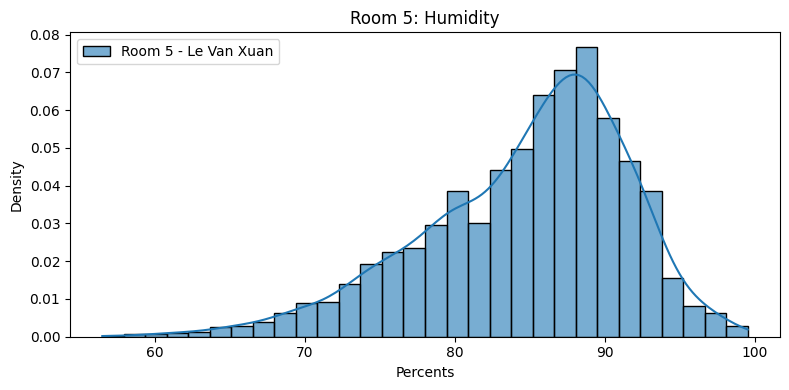

In [38]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df5, 
    x='Độ ẩm',            
    label='Room 5 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 5: Humidity')
plt.xlabel('Percents')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

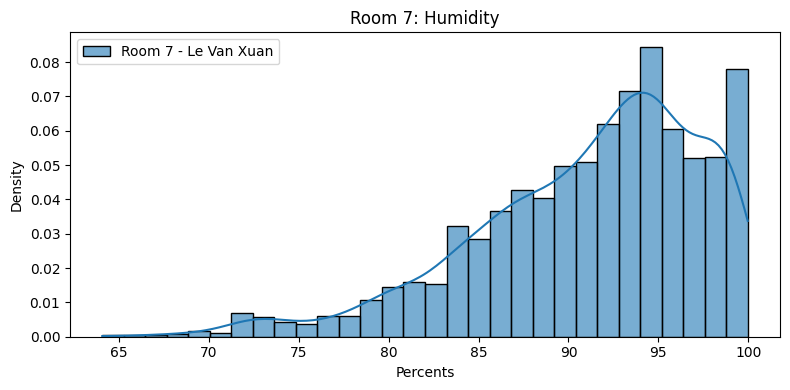

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df6, 
    x='Độ ẩm',            
    label='Room 7 - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('Room 7: Humidity')
plt.xlabel('Percents')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

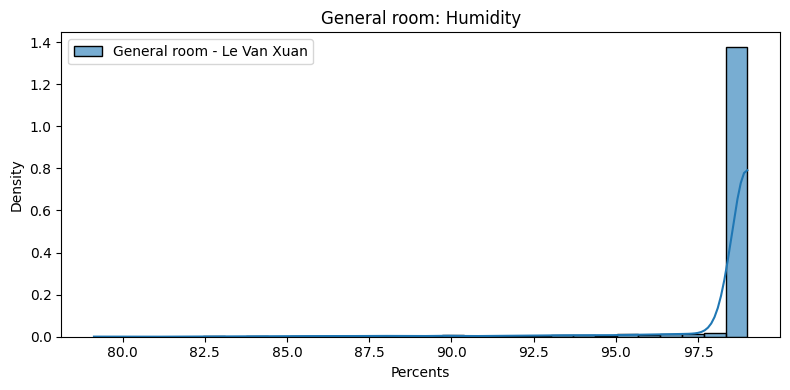

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df8, 
    x='Độ ẩm',            
    label='General room - Le Van Xuan',      
    kde=True,             
    stat='density',       
    bins=30,              
    alpha=0.6             
)

plt.title('General room: Humidity')
plt.xlabel('Percents')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Correlation matrix:
                Room 5    Room 6    Room 7  General Room
Room 5        1.000000  0.968633  0.983290      0.513478
Room 6        0.968633  1.000000  0.977016      0.507533
Room 7        0.983290  0.977016  1.000000      0.510574
General Room  0.513478  0.507533  0.510574      1.000000


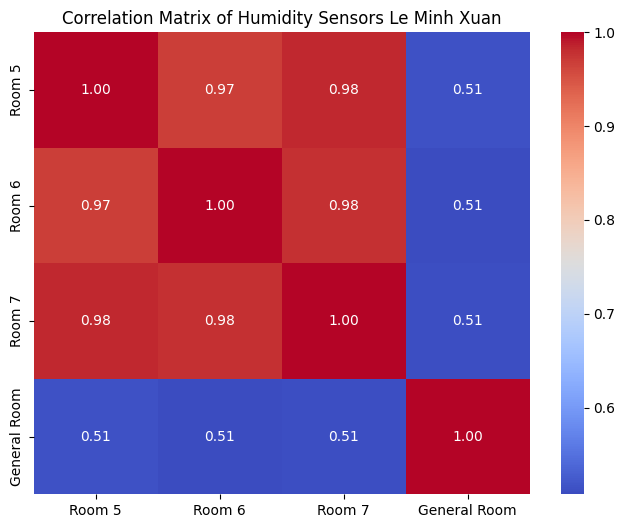

In [41]:
df_corr = pd.DataFrame({
    'Room 5': df5['Độ ẩm'].values,
    'Room 6': df6['Độ ẩm'].values,
    'Room 7': df7['Độ ẩm'].values,
    'General Room': df8['Độ ẩm'].values
})

corr_matrix = df_corr.corr()

print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Humidity Sensors Le Minh Xuan')
plt.show()

R-squared Matrix:
                Room 5   Room 6    Room 7  General Room
Room 5        1.000000  0.93825  0.966858      0.263660
Room 6        0.938250  1.00000  0.954560      0.257590
Room 7        0.966858  0.95456  1.000000      0.260686
General Room  0.263660  0.25759  0.260686      1.000000


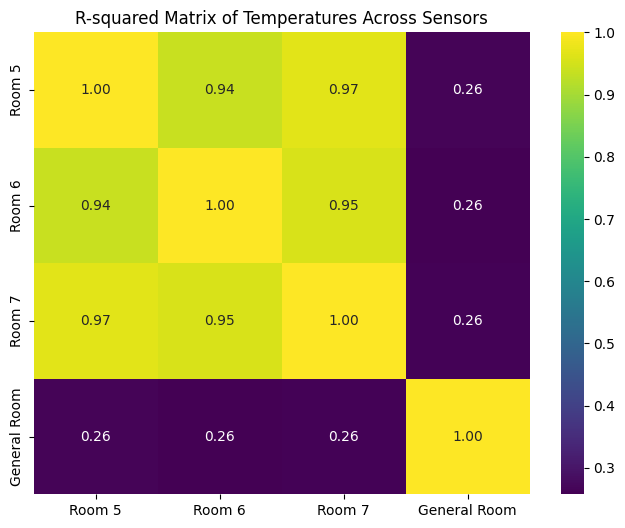

In [42]:
r_squared_matrix = corr_matrix ** 2
print("R-squared Matrix:")
print(r_squared_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(r_squared_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("R-squared Matrix of Temperatures Across Sensors")
plt.show()